In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv


In [2]:
!pip install --upgrade scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 71.1 MB/s eta 0:00:00:00:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [61]:
df=pd.read_csv('/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv')

In [63]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [64]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

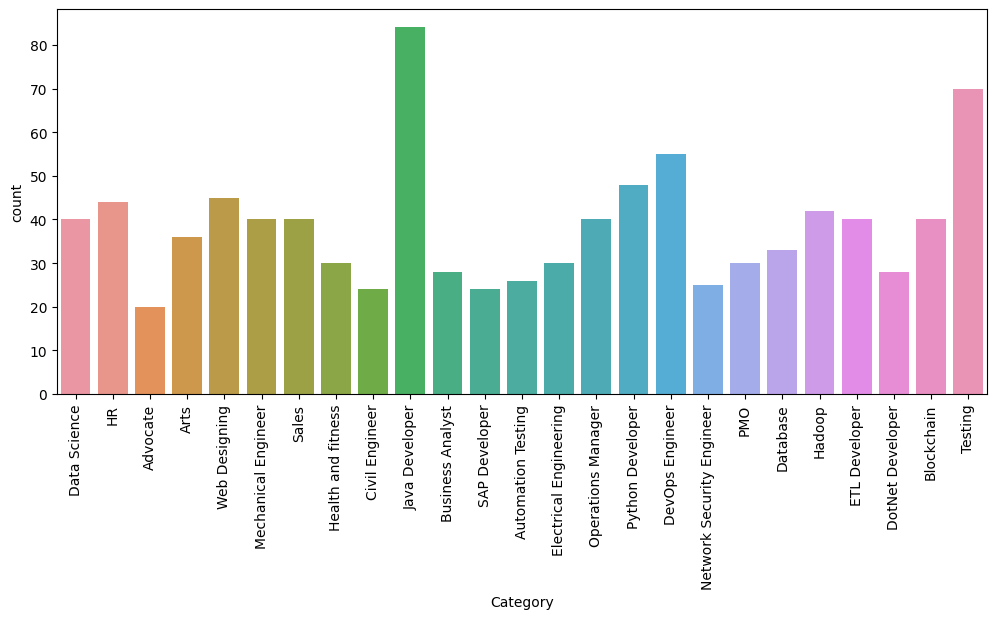

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
sns.countplot(x='Category' ,data=df)
plt.xticks(rotation=90)
plt.show()

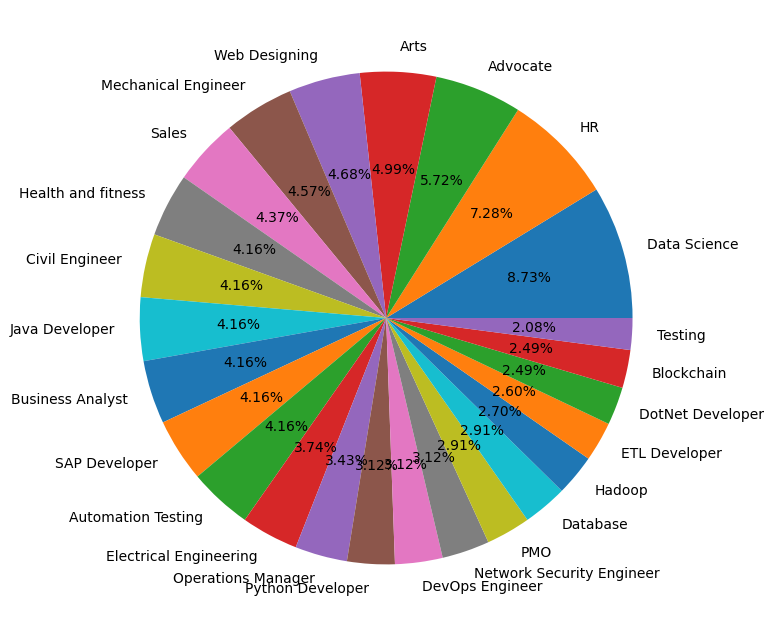

In [68]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()
plt.figure(figsize=(10, 8))
plt.pie(counts,labels=labels,autopct='%1.2f%%')
plt.show()

In [18]:
df['Category'][0]

'Data Science'

In [19]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [21]:
df['Category'].value_counts().max()

84

balance class categories


In [72]:
# number of category
df['Category'].value_counts()
print(df['Category'].value_counts())

# check the maximum value counts
print('maximum',df['Category'].value_counts().max())
max_size=df['Category'].value_counts().max()
# upsampling for balanced the classes
balanced_df=df.groupby('Category').apply(lambda x: x.sample(max_size,replace=True)).reset_index(drop=True)

# check the balance class
print('balanced class--',balanced_df['Category'].value_counts())

# shuffle the data to avoid any order
df=balanced_df.sample(frac=1).reset_index(drop=True)  # frac1 100% rows are shuffled




Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64
maximum 84
balanced class-- Category
Advocate                     84
Hadoop                       84
Testing                      84
Sales                        84


In [27]:
df['Category'].value_counts()

Category
PMO                          84
Database                     84
DotNet Developer             84
Electrical Engineering       84
Business Analyst             84
Java Developer               84
Web Designing                84
Mechanical Engineer          84
Advocate                     84
ETL Developer                84
SAP Developer                84
Health and fitness           84
Network Security Engineer    84
Sales                        84
Blockchain                   84
Hadoop                       84
DevOps Engineer              84
Data Science                 84
Automation Testing           84
Operations Manager           84
HR                           84
Testing                      84
Civil Engineer               84
Arts                         84
Python Developer             84
Name: count, dtype: int64

data cleaning-
1 URLs,
2 hashtags,
3 mentions,
4 special letters,
5 punctuations:

In [37]:
import re
def clean_url(txt):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',txt) 

In [39]:
text1="Visit our website for more details: https://www.example.com"
clean_url(text1)

'Visit our website for more details: '

In [69]:
df['Resume']=df['Resume'].apply(clean_url)

In [43]:
def remove_and_cc(txt):
    return re.sub('RT|cc', ' ', txt)


In [70]:
df['Resume']=df['Resume'].apply(remove_and_cc)

In [45]:
# remove hastag
def remove_has(txt):
    return re.sub('#\S+\s','',txt)

In [71]:
df['Resume']=df['Resume'].apply(remove_has)

In [48]:
# remove mentions
def remove_mention(txt):
    return re.sub('@/S+','',txt)

In [50]:
# remove  punchuation
import string
exclude=string.punctuation
def remove_punc1(text):
    return text.translate(str.maketrans('','',exclude))



In [51]:
df['Resume']=df['Resume'].apply(remove_punc1)

In [52]:
def remove_non_ascii(txt):
    return re.sub(r'[^\x00-\x7f]', ' ', txt)


In [53]:
df['Resume']=df['Resume'].apply(remove_non_ascii)

In [54]:
def normalize_whitespace(txt):
    return re.sub('\s+', ' ', txt).strip()


In [55]:
df['Resume']=df['Resume'].apply(remove_non_ascii)

okay we will combine all cleaning steps into 1

In [73]:
import re
import string

def clean_text(txt):
    # Remove URLs
    pattern = re.compile(r'https?://\S+|www\.\S+')
    txt = pattern.sub(r'', txt)
    
    # Remove RT and cc
    txt = re.sub(r'\b(RT|cc)\b', ' ', txt)
    
    # Remove Hashtags
    txt = re.sub(r'#\S+\s', '', txt)
    
    # Remove Mentions
    txt = re.sub(r'@\S+', '', txt)
    
    # Remove Punctuation
    exclude = string.punctuation
    txt = txt.translate(str.maketrans('', '', exclude))
    
    # Remove Non-ASCII Characters
    txt = re.sub(r'[^\x00-\x7f]', ' ', txt)
    
    # Normalize Whitespace
    txt = re.sub('\s+', ' ', txt).strip()
    
    return txt


In [76]:
df['Resume']=df['Resume'].apply(clean_text)

In [74]:
clean_text("my #### $ #  #sahil webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and access it'

In [77]:
df['Resume'][0]

'AREA OF EXPE ISE PROFILE Around 10 plus years proven experience with best global brand Wipro with below expertise PMO ITIL Management Process Improvements Project Process Audits Planning Scheduling EffortIssueRisk Tracking Risk Issue Management SLA Management Workforce staffing Resource Management Transition Operations management SKILLS Project Management Tools CA Clarity Visio and Office ITIL Incident management Recruitment and workforce management Technical SAP HR MRS CPRO Confluence Microsoft Office Word PowerPointExcellent knowledge hands on experience in advanced MS Excel Knowledge on MS Project Sharepoint Reporting Ticket Tool Xtraction CA Service Desk ITracker Education Details MBA HR and Finance Bengaluru Karnataka RKIMS College Senior Executive PMO Senior Executive PMO Consultant Skill Details OPERATIONS Exprience 125 months STAFFING Exprience 125 months HR Exprience 79 months PMO Exprience 84 monthsCompany Details company Ensono LLP description Roles Responsiblites Responsib

In [78]:
df['Resume'][3]

'Education Details January 2009 PG Sports science Dr BMN College of Home Science January 2008 BSc Food Science Nutrition Dr BMN College of Home Science January 2004 HSC Central Railways Jr college of Science and Commerce January 2002 SSC HISTORY IESs Modern English School MSc Nutrition College of Home Science nutritionist and health promoter 9yrs experience as a nutritionist and health coach Skill Details Company Details company UGC NET description CAREER OBJECTIVE To use my qualifications as a nutritionist and health promoter to contribute to the well being of individuals in the community UGC NET Certificate for Lectureship MAR 2013 SKILLS LEARNT Working in a team environment Working as an individual Time management to ensure all customers are served sufficiently and all tasks are completed to a high standard Working under pressure and in a busy environment Personal presentation Communication Skills 9 years of work experience at healthcare startups health clubs has enhanced my communi

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
required_text = tfidf.fit_transform(df['Resume'])
print(required_text.toarray())




[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [84]:
df['Category'].unique()

array(['PMO', 'Health and fitness', 'Testing', 'Automation Testing',
       'Business Analyst', 'SAP Developer', 'Hadoop', 'Arts',
       'Java Developer', 'Database', 'Mechanical Engineer',
       'Network Security Engineer', 'Python Developer',
       'DotNet Developer', 'Civil Engineer', 'Sales', 'DevOps Engineer',
       'Web Designing', 'ETL Developer', 'Operations Manager',
       'Data Science', 'Blockchain', 'Advocate', 'Electrical Engineering',
       'HR'], dtype=object)

In [85]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Category']=lb.fit_transform(df['Category'])


In [86]:
df['Category'].unique()

array([19, 14, 23,  2,  4, 21, 13,  1, 15,  7, 16, 17, 20,  9,  5, 22,  8,
       24, 10, 18,  6,  3,  0, 11, 12])

spliting

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(required_text,df['Category'],test_size=0.2,random_state=42)

In [88]:
x_train.shape

(1680, 7856)

In [90]:
x_test.shape

(420, 7856)

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ensure that X_train and X_test are dense if they are sparse
x_train = x_train.toarray() if hasattr(x_train, 'toarray') else x_train
x_test = x_test.toarray() if hasattr(x_test, 'toarray') else x_test

# 1. Train KNeighborsClassifier
knn_model = OneVsRestClassifier(KNeighborsClassifier())
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
print("\nKNeighborsClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")


KNeighborsClassifier Results:
Accuracy: 1.0000
Confusion Matrix:
[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  

In [97]:
# 2. Train SVC
svc_model = OneVsRestClassifier(SVC())
svc_model.fit(x_train, y_train)
y_pred_svc = svc_model.predict(x_test)
print("\nSVC Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svc)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svc)}")


SVC Results:
Accuracy: 1.0000
Confusion Matrix:
[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0 

In [98]:

import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(svc_model, open('clf.pkl', 'wb'))
pickle.dump(lb, open("encoder.pkl",'wb'))

In [101]:
# Function to predict the category of a resume
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = clean_text(input_resume) 

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = tfidf.transform([cleaned_text])
    
    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = svc_model.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = lb.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name

In [103]:
resume = """
John Doe
Data Scientist
john.doe@example.com | (123) 456-7890 | https://linkedin.com/in/johndoe | https://github.com/johndoe | https://johndoe.com

Summary
Highly motivated and results-oriented Data Scientist with 3+ years of experience in machine learning, statistical analysis, and data visualization. Proficient in programming languages such as Python, R, and SQL, with expertise in data wrangling, predictive modeling, and deploying machine learning models. Adept at extracting valuable insights from complex datasets to drive business decisions. Proven track record of applying data-driven solutions in e-commerce and finance.

Skills
- Programming Languages: Python, R, SQL, Java
- Data Analysis & Visualization: Pandas, NumPy, Matplotlib, Seaborn, Plotly, Power BI, Tableau
- Machine Learning & AI: Scikit-learn, TensorFlow, Keras, XGBoost, LightGBM
- Deep Learning: Neural Networks, CNNs, RNNs, LSTM, Transfer Learning
- Data Preprocessing & Feature Engineering: Data wrangling, missing value imputation, feature scaling, normalization
- Statistical Analysis: Hypothesis testing, A/B testing, regression analysis, time series forecasting
- Databases: MySQL, PostgreSQL, MongoDB
- Big Data: Apache Hadoop, Spark
- Cloud Platforms: AWS, Google Cloud, Microsoft Azure
- Version Control: Git, GitHub
- Other Tools: Jupyter, VS Code, Docker, GitLab

Education
Bachelor of Science in Computer Science & Engineering (B.Tech)
[University Name], [City, State] | 2023
- Relevant Courses: Data Structures & Algorithms, Statistical Inference, Machine Learning, Big Data Analytics, Data Visualization, AI

Certifications
- Data Science Specialization (Coursera)
- Microsoft Certified Azure Data Scientist

Professional Experience

Data Scientist | ABC Corp
[City, State] | June 2023 – Present
- Built and deployed predictive models using machine learning algorithms (e.g., logistic regression, decision trees, random forests) to predict customer churn, increasing retention by 15%.
- Developed automated data pipelines for data collection, cleaning, and transformation, improving process efficiency by 30%.
- Utilized SQL and Python to query and analyze data from relational databases, producing insights to support business decisions.
- Worked with stakeholders to define business problems and deliver actionable, data-driven solutions.

Data Analyst | XYZ Inc
[City, State] | January 2021 – May 2023
- Analyzed large datasets and created interactive dashboards using Tableau and Power BI to provide business insights.
- Conducted A/B testing and hypothesis testing to evaluate the impact of marketing strategies on customer engagement.
- Wrote SQL queries for data extraction and preparation, supporting multiple teams in decision-making.

Projects

Customer Segmentation
- Used k-means clustering to segment customers based on purchasing behavior, resulting in targeted marketing strategies and a 20% increase in conversion rates.
- Tools Used: Python, Pandas, Scikit-learn, Matplotlib, Seaborn

Stock Price Prediction Using LSTM
- Built an LSTM model to predict stock prices, achieving a root mean squared error (RMSE) of 0.85.
- Tools Used: TensorFlow, Keras, Python, Pandas, NumPy

Sales Forecasting for E-Commerce
- Developed a time-series forecasting model using ARIMA to predict sales for an e-commerce platform, reducing stock-outs by 10%.
- Tools Used: Python, ARIMA, Prophet, Pandas

Credit Risk Modeling
- Built a random forest model to predict loan defaults, achieving an accuracy of 92% and a precision of 88%.
- Tools Used: Python, Scikit-learn, Pandas, NumPy

Achievements
- Increased customer retention by 15% through predictive modeling for churn prediction.
- Reduced operational costs by 20% by automating data collection and cleaning processes.
- Published 2 papers on machine learning techniques for customer behavior analysis.

Additional Information
- Languages: English (Fluent), Spanish (Intermediate)
- Volunteer Experience: Data Science mentor for underprivileged students at [Organization Name].
"""


In [104]:
pred(resume)

'Data Science'